In [15]:
import h5py
import numpy as np
import pandas as pd
import json

In [2]:
import matplotlib
font = { 'size'   : 17}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import sys
sys.path.append("DL1_framework/Training")
import train_tools as tt

Using TensorFlow backend.


In [3]:
file_Znunu = h5py.File("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/Znunu/Znunu_merged.h5", 'r')
df_Znunu = pd.DataFrame(file_Znunu['jets'][:])

file_Zmumu = h5py.File("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/Zmumu/Zmumu_merged.h5", 'r')
df_Zmumu = pd.DataFrame(file_Zmumu['jets'][:])

In [4]:
df_Znunu.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Zmumu.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
df_bb_test = pd.concat([df_Zmumu, df_Znunu]).query("eventNumber%3==2")

In [11]:
file_tt_test = h5py.File("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/ttbar/MC16a_ttbar_EMTopo-no_pT-cuts_4M_odd.h5", 'r')
df_ttbar_valid = pd.DataFrame(file_tt_test['jets'][:int(2e6)])
# df_ttbar_test = pd.DataFrame(file_tt_test['jets'][int(1.5e6):])

In [10]:
train_vars = ["abs_eta_uncalib",
"pt_uncalib",
"JetFitter_mass",
"JetFitter_isDefaults",
"JetFitter_energyFraction",
"JetFitter_significance3d",
"JetFitter_nVTX",
"JetFitter_nSingleTracks",
"JetFitter_nTracksAtVtx",
"JetFitter_N2Tpair",
"JetFitter_deltaR",
"SV1_NGTinSvx",
"SV1_masssvx",
"SV1_isDefaults",
"SV1_N2Tpair",
"SV1_efracsvx",
"SV1_deltaR",
"SV1_Lxy",
"SV1_L3d",
"SV1_significance3d",
"IP2D_bu",
"IP2D_isDefaults",
"IP2D_bc",
"IP2D_cu",
"IP3D_bu",
"IP3D_isDefaults",
"IP3D_bc",
"IP3D_cu",
"secondaryVtx_nTrks",
"secondaryVtx_isDefaults",
"secondaryVtx_m",
"secondaryVtx_E",
"secondaryVtx_EFrac",
"secondaryVtx_L3d",
"secondaryVtx_Lxy",
"secondaryVtx_max_trk_flightDirRelEta",
"secondaryVtx_min_trk_flightDirRelEta",
"secondaryVtx_avg_trk_flightDirRelEta",
"max_trk_flightDirRelEta",
"min_trk_flightDirRelEta",
"avg_trk_flightDirRelEta",
"iprnn_pb",
"iprnn_pc",
"iprnn_pu",
"softMuon_dR",
"softMuon_qOverPratio",
"softMuon_momentumBalanceSignificance",
"softMuon_scatteringNeighbourSignificance",
"softMuon_pTrel",
"softMuon_ip3dD0",
"softMuon_ip3dZ0",
"softMuon_ip3dD0Significance",
"softMuon_ip3dZ0Significance",
"softMuon_isDefaults"
]
variablelist=train_vars

In [18]:
default_dict ="DL1_framework/Preprocessing/dicts/params_MC16D-ext_2018-PFlow_70-4M_mu.json"
with open(default_dict) as vardict:
                default_dict = json.load(vardict)
default_dict2 = tt.Gen_default_dict(default_dict)        

df_bb_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_bb_test.fillna(default_dict2, inplace=True)
df_ttbar_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ttbar_valid.fillna(default_dict2, inplace=True)

In [19]:
scale_dic = {}
for var in default_dict:
    scale_dic[var['name']] = var

In [20]:
for var in train_vars:
    df_bb_test[var] = (df_bb_test[var] - scale_dic[var]['shift'])/scale_dic[var]['scale']
    df_ttbar_valid[var] = (df_ttbar_valid[var] - scale_dic[var]['shift'])/scale_dic[var]['scale']

In [48]:
class_cut = "HadronConeExclExtendedTruthLabelID==0 | HadronConeExclExtendedTruthLabelID==4 | HadronConeExclExtendedTruthLabelID==5 | HadronConeExclExtendedTruthLabelID==55"
df_bb_test.query(class_cut, inplace=True)
df_ttbar_valid.query(class_cut, inplace=True)

In [49]:
df_comb_test = pd.concat([df_bb_test[train_vars], df_ttbar_valid[train_vars]])

In [50]:
labels_test = pd.concat([df_bb_test["HadronConeExclExtendedTruthLabelID"], 
                         df_ttbar_valid["HadronConeExclExtendedTruthLabelID"]])

In [51]:
labels_test.replace({0:0, 4:1, 5:2, 55:3}, inplace=True)

In [52]:
labels_test[labels_test==127]

Series([], Name: HadronConeExclExtendedTruthLabelID, dtype: int64)

In [53]:
from keras.utils import np_utils
Y_test = np_utils.to_categorical(labels_test.values, 4)
# X_test = df_comb_test.values()

In [54]:
df_comb_test.to_hdf("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/test_Xtrain.h5", "X_train")
np.save("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/test_Ytrain.h5", Y_test)

In [27]:
len(df_Znunu.query("eventNumber%3<2"))+len(df_Zmumu.query("eventNumber%3<2"))

1014351

In [6]:
len(df_Znunu.query("eventNumber%3==2"))+len(df_Zmumu.query("eventNumber%3==2"))

508020

In [29]:
df_comb_bb = pd.concat([df_Zmumu, df_Znunu])

In [ ]:
df_

In [30]:
bb_train = df_comb_bb.query("eventNumber%3<2")
bb_test = df_comb_bb.query("eventNumber%3==2")

In [31]:
file_ttbar = h5py.File("/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/ttbar/MC16a_ttbar_EMTopo-no_pT-cuts_6M.h5", 'r')
df_ttbar = pd.DataFrame(file_ttbar['jets'][:])

In [32]:
df_ttbar.replace([np.inf, -np.inf], np.nan, inplace=True)

In [38]:
print("bjets", len(df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")))
print("cjets", len(df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")))
print("ujets", len(df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")))

bjets 2276873
cjets 473558
ujets 2960004


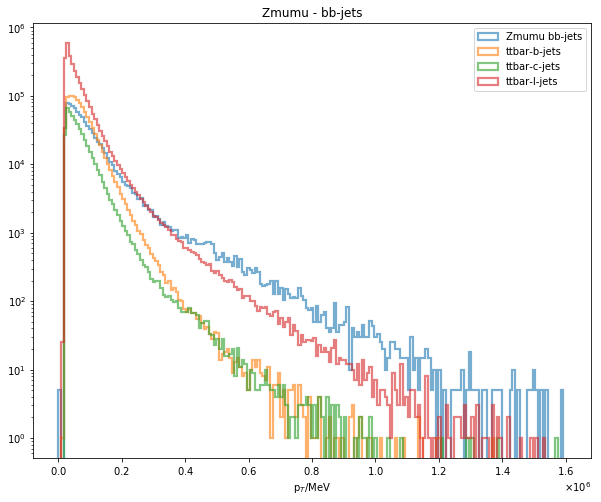

In [42]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)


var = "pt_uncalib"


# plt.hist([df_70['pt_uncalib'], df_140['pt_uncalib'], df_280['pt_uncalib'], df_500['pt_uncalib'], df_1000['pt_uncalib']], 
# #          bins='auto', histtype='step', density=1,
#           bins=np.linspace(0, 1.6e6, 200), histtype='step',
#          label=["0-70", "70-140", "140-280", "280-500", "500-1000", "1000-E"],
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)

# plt.hist(pd.concat([df_70['pt_uncalib'], df_140['pt_uncalib'], df_280['pt_uncalib'], df_500['pt_uncalib'], df_1000['pt_uncalib']]), 
#          bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
#          label=["Zmumu bb-jets"],
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.hist(df_comb_bb["pt_uncalib"], 
         bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
         label=["Zmumu bb-jets"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")['pt_uncalib'][:1000000], 
         bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
         label=["ttbar-b-jets"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")['pt_uncalib'], 
         bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
         label=["ttbar-c-jets"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)

plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")['pt_uncalib'], 
         bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
         label=["ttbar-l-jets"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)


# plt.hist(pd.concat([df_3['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["0-70"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_2['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["70-140"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["140-280"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_4['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["280-500"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_5['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["500-1000"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_6['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["1000-E"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)


plt.xlabel('p$_T$/MeV')
plt.yscale('log')
# plt.xscale('log')
plt.title('Zmumu - bb-jets')
plt.legend()
plt.savefig("bbjets-Zmumu.pdf", transparent=True)

In [9]:
from hep_ml.reweight import BinsReweighter

In [41]:
pt_bins = np.linspace(0, 6e6, 400)
eta_bins = np.linspace(0, 2.5, 26)

histvals_b = np.histogram2d(w_target['abs_eta_uncalib'], w_target['pt_uncalib'], [eta_bins, pt_bins])
histvals_bb = np.histogram2d(df_comb_bb['abs_eta_uncalib'], df_comb_bb['pt_uncalib'], [eta_bins, pt_bins])

histvals_b = histvals_b[0]
histvals_bb = histvals_bb[0]

histvals_b[histvals_b == 0] = 1
histvals_bb[histvals_bb == 0] = 1

bbweight_hist = np.divide(histvals_b, histvals_bb)

bb_locations_pt = np.digitize(df_comb_bb['pt_uncalib'].values,pt_bins)
bb_locations_eta = np.digitize(df_comb_bb['abs_eta_uncalib'].values,eta_bins)

bb_locations_pt[bb_locations_pt >= len(pt_bins)-1] = len(pt_bins)-2
bb_locations_eta[bb_locations_eta >= len(eta_bins)-1] = len(eta_bins)-2

b_weights = np.ones(len(w_target))
bb_weights = np.array([bbweight_hist[x] for x in zip(bb_locations_eta,bb_locations_pt)])

1000000

In [43]:
w_target = df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")[['pt_uncalib', 'abs_eta_uncalib']][:1000000]

In [11]:
reweighter_c = BinsReweighter(n_bins=400, n_neighs=2)
reweighter_c.fit(original=df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")[['pt_uncalib', 'abs_eta_uncalib']], target=w_target)
c_weights = reweighter_c.predict_weights(df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")[['pt_uncalib', 'abs_eta_uncalib']])

In [12]:
reweighter_u = BinsReweighter(n_bins=400, n_neighs=2)
reweighter_u.fit(original=df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")[['pt_uncalib', 'abs_eta_uncalib']], target=w_target)
u_weights = reweighter_u.predict_weights(df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")[['pt_uncalib', 'abs_eta_uncalib']])

In [74]:
reweighter_bb = BinsReweighter(n_bins=400, n_neighs=4)
reweighter_bb.fit(original=df_comb_bb[['pt_uncalib', 'abs_eta_uncalib']], target=w_target)
bb_weights = reweighter_bb.predict_weights(df_comb_bb[['pt_uncalib', 'abs_eta_uncalib']])

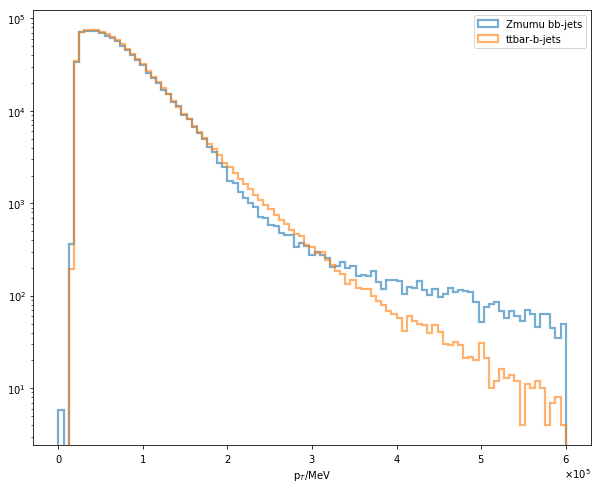

In [75]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)


var = "pt_uncalib"

plt.hist(df_comb_bb["pt_uncalib"], 
         bins=np.linspace(0, 0.6e6, 100), histtype='step',# density=1,
         label=["Zmumu bb-jets"], weights=bb_weights,
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")['pt_uncalib'][:1000000], 
         bins=np.linspace(0, 0.6e6, 100), histtype='step',# density=1,
         label=["ttbar-b-jets"], 
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")['pt_uncalib'], 
#          bins=np.linspace(0, 0.6e6, 200), histtype='step',# density=1,
#          label=["ttbar-c-jets"], weights=c_weights,
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)

# plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")['pt_uncalib'], 
#          bins=np.linspace(0, 0.6e6, 200), histtype='step',# density=1,
#          label=["ttbar-l-jets"], weights=u_weights,
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.xlabel('p$_T$/MeV')
plt.yscale('log')
# plt.xscale('log')
# plt.title('Zmumu - bb-jets')
plt.legend()
None

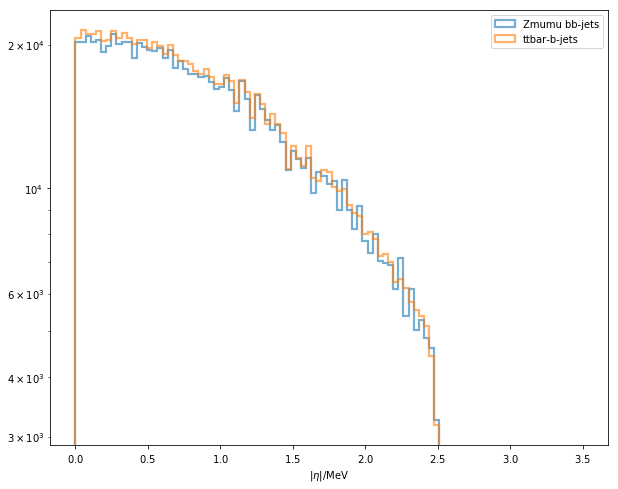

In [78]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)


var = "pt_uncalib"

plt.hist(df_comb_bb["abs_eta_uncalib"], 
         bins=np.linspace(0, 3.5, 100), histtype='step',# density=1,
         label=["Zmumu bb-jets"], weights=bb_weights,
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")['abs_eta_uncalib'][:1000000], 
         bins=np.linspace(0, 3.5, 100), histtype='step',# density=1,
         label=["ttbar-b-jets"], 
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")['pt_uncalib'], 
#          bins=np.linspace(0, 0.6e6, 200), histtype='step',# density=1,
#          label=["ttbar-c-jets"], weights=c_weights,
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)

# plt.hist(df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")['pt_uncalib'], 
#          bins=np.linspace(0, 0.6e6, 200), histtype='step',# density=1,
#          label=["ttbar-l-jets"], weights=u_weights,
#          stacked=False, fill=False, linewidth=2.2, alpha=0.6)
plt.xlabel('$|\eta|$/MeV')
plt.yscale('log')
# plt.xscale('log')
# plt.title('Zmumu - bb-jets')
plt.legend()
None

In [60]:
df_comb_bb["weight"] = bb_weights
df_bjets = df_ttbar.query("HadronConeExclExtendedTruthLabelID==5")[:1000000]
df_bjets["weight"] = np.ones(len(df_bjets))
# df_cjets = df_ttbar.query("HadronConeExclExtendedTruthLabelID==4")
# df_cjets["weight"] = c_weights
# df_ujets = df_ttbar.query("HadronConeExclExtendedTruthLabelID==0")
# df_ujets["weight"] = u_weights

In [61]:
outfile = "/home/manuel/Desktop/work_btag/gluon_fusion_ntuples/new-taggers/trainfile.h5"
df_comb_bb.to_hdf(outfile, "bbjets")
df_bjets.to_hdf(outfile, "bjets")
# df_cjets.to_hdf(outfile, "cjets")
# df_ujets.to_hdf(outfile, "ujets")

In [38]:
print(len(df_comb_bb))
print(len(df_bjets))
print(len(df_cjets))
print(len(df_ujets))

853525
2276873
473558
2960004


In [17]:
variablelist =[
"abs_eta_uncalib",
"pt_uncalib",
"JetFitter_mass",
"JetFitter_energyFraction",
"JetFitter_significance3d",
"JetFitter_nVTX",
"JetFitter_nSingleTracks",
"JetFitter_nTracksAtVtx",
"JetFitter_N2Tpair",
"JetFitter_deltaR",
"SV1_NGTinSvx",
"SV1_masssvx",
"SV1_N2Tpair",
"SV1_efracsvx",
"SV1_deltaR",
"SV1_Lxy",
"SV1_L3d",
"SV1_significance3d",
"IP2D_bu",
"IP2D_bc",
"IP2D_cu",
"IP3D_bu",
"IP3D_bc",
"IP3D_cu",
"secondaryVtx_nTrks",
"secondaryVtx_isDefaults",
"secondaryVtx_m",
"secondaryVtx_E",
"secondaryVtx_EFrac",
"secondaryVtx_L3d",
"secondaryVtx_Lxy",
"secondaryVtx_max_trk_flightDirRelEta",
"secondaryVtx_min_trk_flightDirRelEta",
"secondaryVtx_avg_trk_flightDirRelEta",
"max_trk_flightDirRelEta",
"min_trk_flightDirRelEta",
"avg_trk_flightDirRelEta",
"iprnn_pb",
"iprnn_pc",
"iprnn_pu",
"softMuon_dR",
"softMuon_qOverPratio",
"softMuon_momentumBalanceSignificance",
"softMuon_scatteringNeighbourSignificance",
"softMuon_pTrel",
"softMuon_ip3dD0",
"softMuon_ip3dZ0",
"softMuon_ip3dD0Significance",
"softMuon_ip3dZ0Significance"
]

In [18]:
print(df_comb_bb.columns.values)

['MV2c10_discriminant' 'MV2r_discriminant' 'MV2rmu_discriminant' 'DL1_pu'
 'DL1_pc' 'DL1_pb' 'DL1r_pu' 'DL1r_pc' 'DL1r_pb' 'DL1rmu_pu' 'DL1rmu_pc'
 'DL1rmu_pb' 'IP2D_pu' 'IP2D_pc' 'IP2D_pb' 'IP3D_pu' 'IP3D_pc' 'IP3D_pb'
 'SV1_pu' 'SV1_pc' 'SV1_pb' 'rnnip_pu' 'rnnip_pc' 'rnnip_pb' 'rnnip_ptau'
 'pt_uncalib' 'eta_uncalib' 'abs_eta_uncalib' 'IP2D_cu' 'IP2D_bu'
 'IP2D_bc' 'IP3D_cu' 'IP3D_bu' 'IP3D_bc' 'secondaryVtx_m' 'secondaryVtx_E'
 'secondaryVtx_EFrac' 'secondaryVtx_min_trk_flightDirRelEta'
 'secondaryVtx_max_trk_flightDirRelEta'
 'secondaryVtx_avg_trk_flightDirRelEta' 'min_trk_flightDirRelEta'
 'max_trk_flightDirRelEta' 'avg_trk_flightDirRelEta' 'SMT_discriminant'
 'JetFitter_energyFraction' 'JetFitter_mass' 'JetFitter_significance3d'
 'JetFitter_deltaphi' 'JetFitter_deltaeta' 'JetFitter_massUncorr'
 'JetFitter_dRFlightDir' 'SV1_masssvx' 'SV1_efracsvx' 'SV1_significance3d'
 'SV1_dstToMatLay' 'SV1_deltaR' 'SV1_Lxy' 'SV1_L3d' 'softMuon_pt'
 'softMuon_dR' 'softMuon_eta' 'softMuon_phi' 's

In [46]:
df_bjets.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cjets.replace([np.inf, -np.inf], np.nan, inplace=True)
df_ujets.replace([np.inf, -np.inf], np.nan, inplace=True)

/home/manuel/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


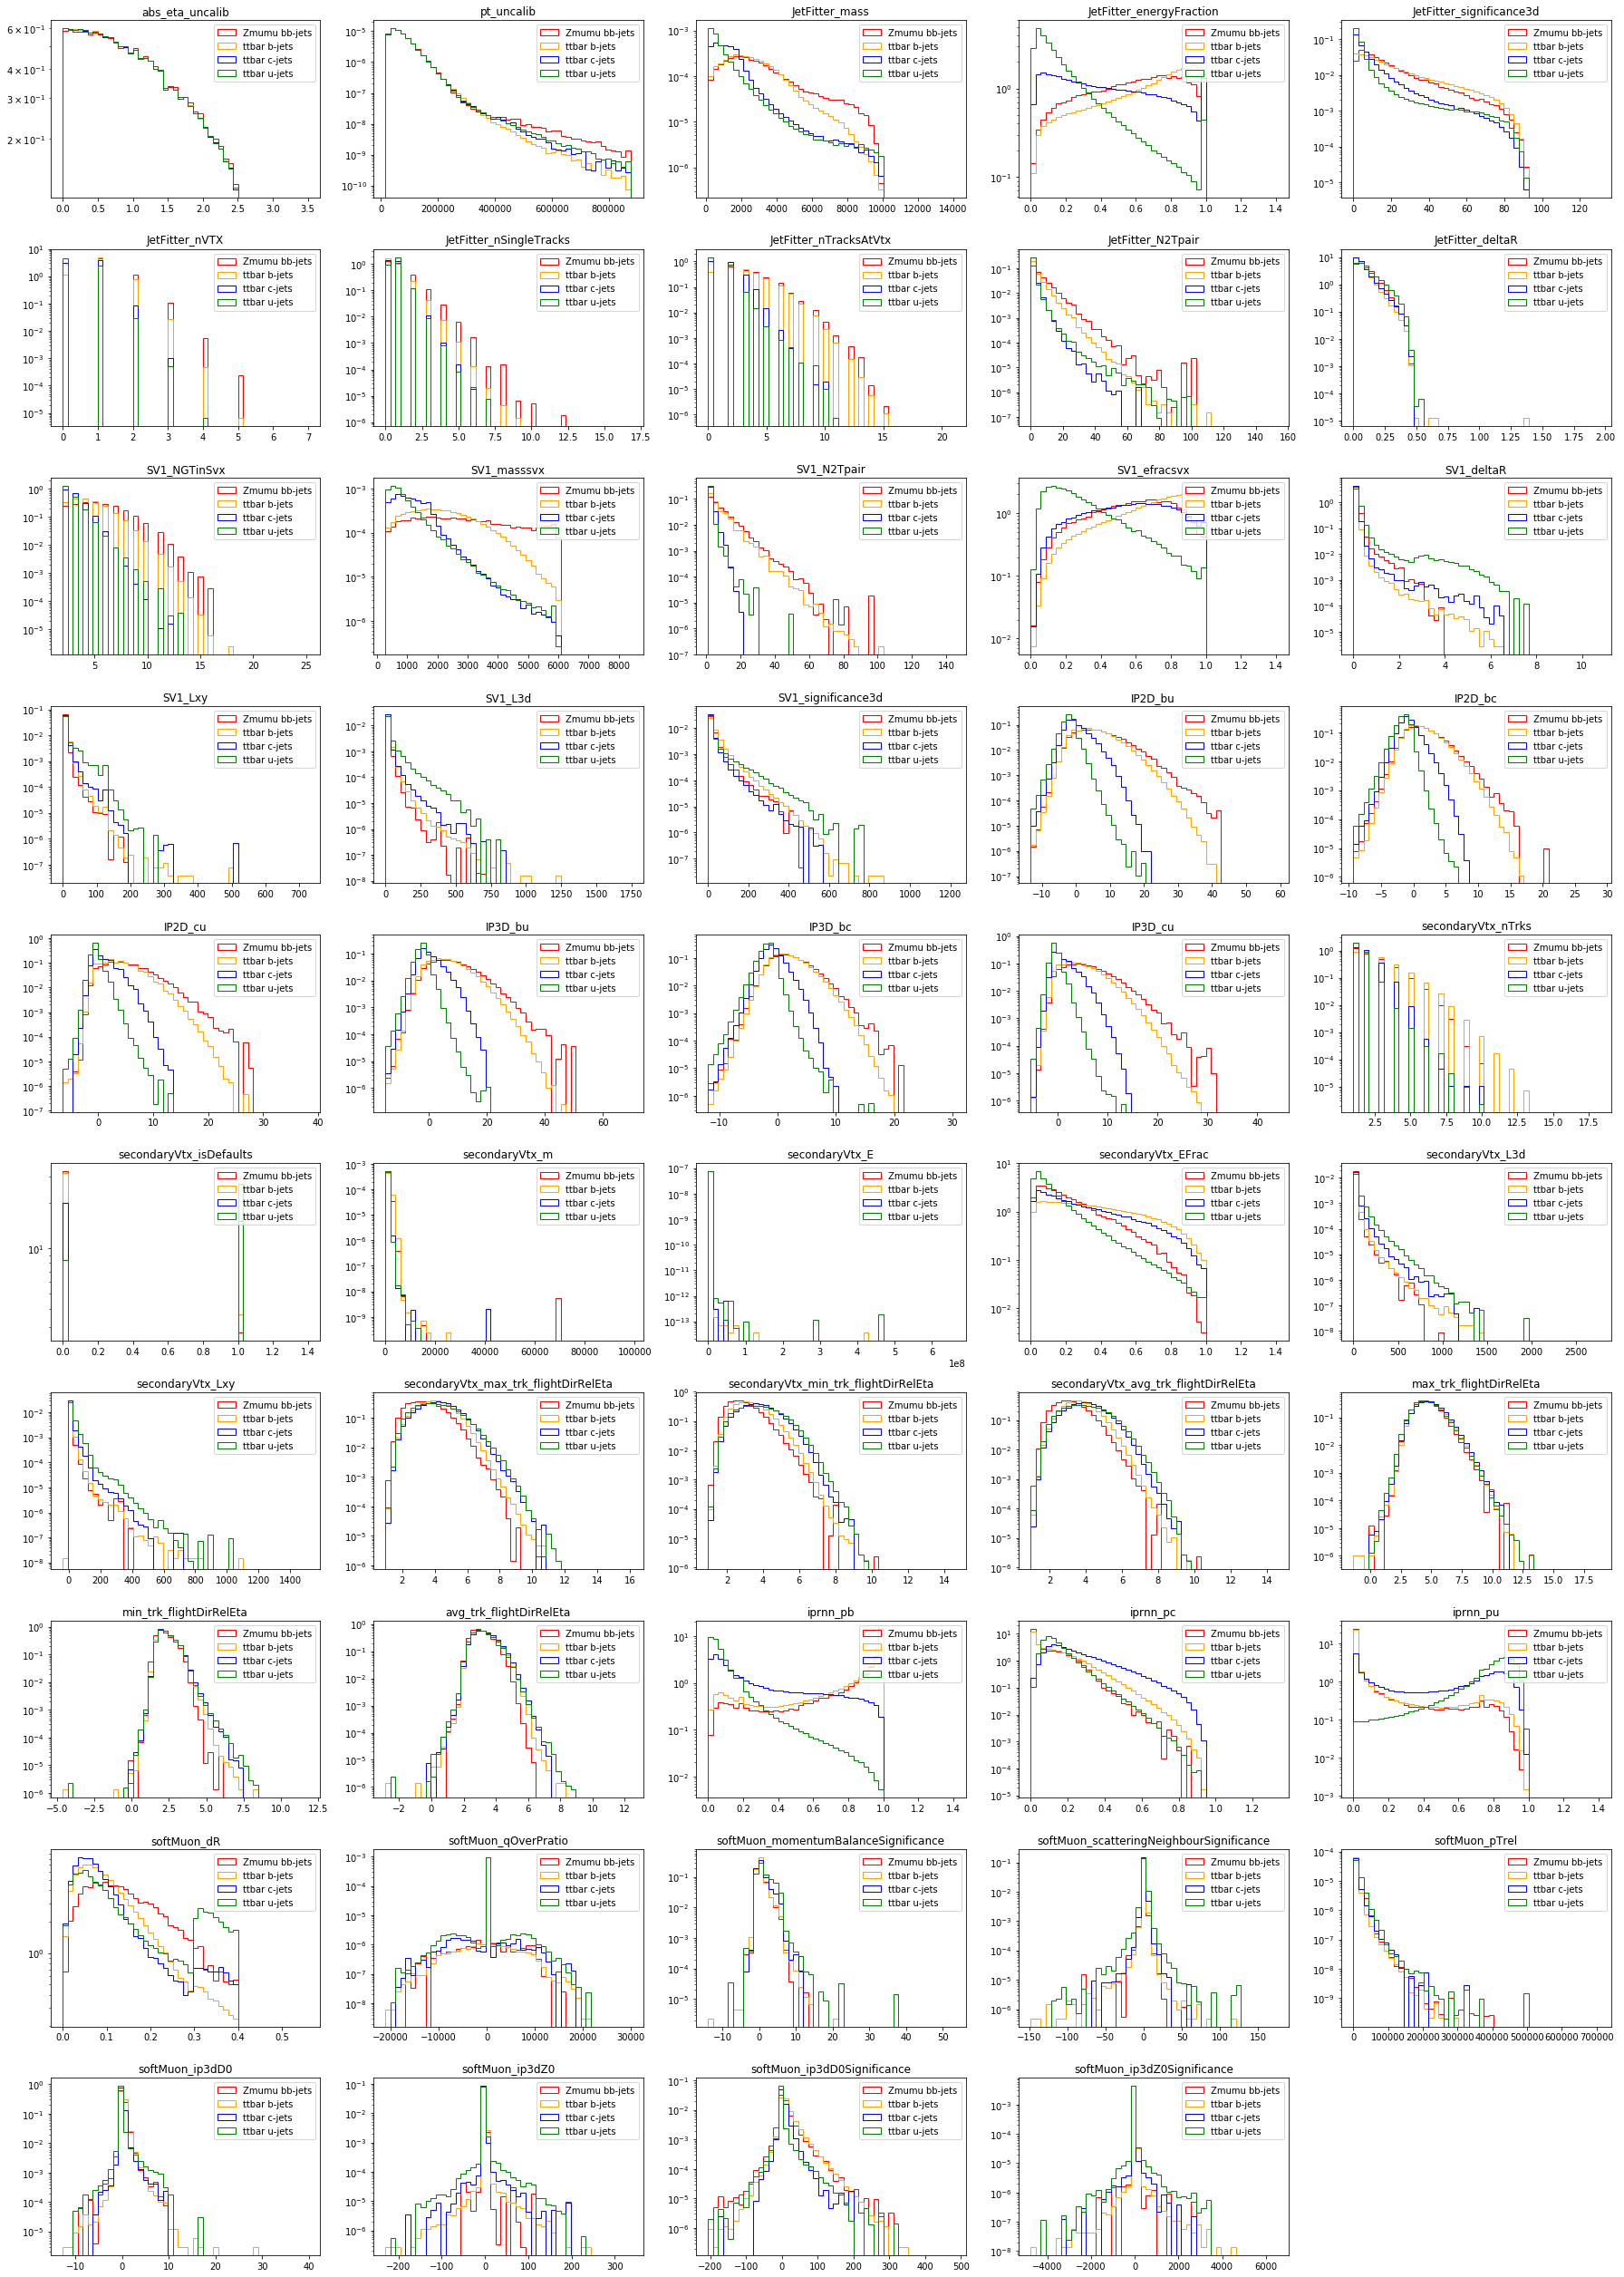

In [36]:
fig, ax = plt.subplots(10, 5, figsize=(25, 35))
nbins = 50
# nbins = 20

varcounter = -1
for i, axobjlist in enumerate(ax):
      for j, axobj in enumerate(axobjlist):
        varcounter+=1
        if varcounter < len(variablelist):
#             X = df[[variablelist[varcounter], 'HadronConeExclTruthLabelID', 'HadronConeExclExtendedTruthLabelID']]
#             X = df.query('min_trk_flightDirRelEta>5.25')[[variablelist[varcounter], 'HadronConeExclTruthLabelID']]
#             X.dropna(inplace=True)
            var = variablelist[varcounter]
            bb = df_comb_bb[[var, "weight"]].dropna()
            b = df_bjets[[var, "weight"]].dropna()
            c = df_cjets[[var, "weight"]].dropna()
            u = df_ujets[[var, "weight"]].dropna()
            


            minval = np.amin(b[var])
            if 'pt' in var:
                maxval = np.percentile(u[var],99.99)
            else:
                maxval = max([np.amax(u[var]), np.amax(c[var]), np.amax(b[var]), np.amax(bb[var])])*1.4
            binning = np.linspace(minval,maxval,nbins)

            axobj.hist(bb[var],binning,histtype=u'step', color='r',label='Zmumu bb-jets',density=1, weights=bb["weight"])
            axobj.hist(b[var],binning,histtype=u'step', color='orange',label='ttbar b-jets',density=1, weights=b["weight"])
            axobj.hist(c[var],binning,histtype=u'step', color='b',label='ttbar c-jets',density=1, weights=c["weight"])
            axobj.hist(u[var],binning,histtype=u'step', color='g',label='ttbar u-jets',density=1, weights=u["weight"])

            
            axobj.legend()
            axobj.set_yscale('log',nonposy='clip')
            axobj.set_title(variablelist[varcounter])

        else:
            axobj.axis('off')

plt.tight_layout()
#plt.savefig('mc16d_train_ttbar.pdf')
plt.savefig("Zmumu-btagVars-new.pdf", transparent=True)
plt.show()

In [31]:
len(df_comb_bb.query("SV1_masssvx>6000"))

0

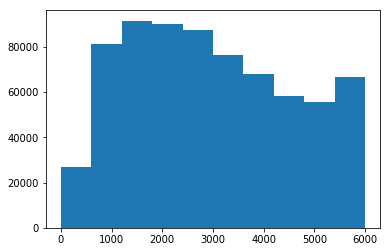

In [35]:
plt.hist(df_comb_bb["SV1_masssvx"].dropna())
None

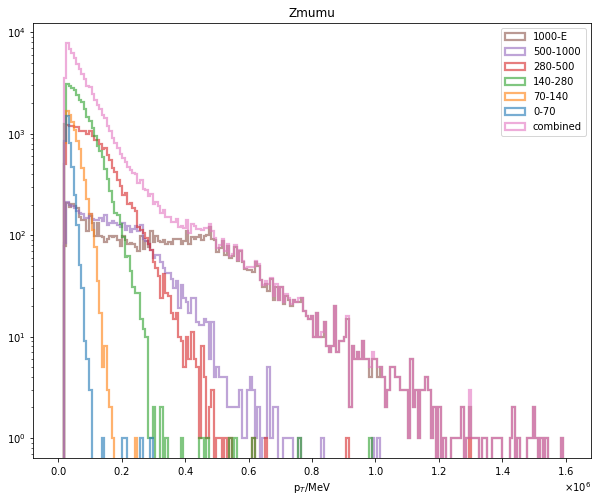

In [50]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)


var = "pt_uncalib"


plt.hist([df_3.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_2.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_4.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_5.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_6.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib']], 
#          bins='auto', histtype='step', density=1,
          bins=np.linspace(0, 1.6e6, 200), histtype='step',
         label=["0-70", "70-140", "140-280", "280-500", "500-1000", "1000-E"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)

plt.hist(pd.concat([df_3.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_2.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_4.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_5.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib'],df_6.query('HadronConeExclExtendedTruthLabelID==55')['pt_uncalib']]), 
         bins=np.linspace(0, 1.6e6, 200), histtype='step',# density=1,
         label=["combined"],
         stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_3['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["0-70"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_2['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["70-140"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["140-280"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_4['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["280-500"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_5['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["500-1000"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)
# plt.hist(pd.concat([df_6['pt_uncalib']]), bins='auto', histtype='step', #normed=1,
#                  label=["1000-E"],stacked=False, fill=False, linewidth=2.2, alpha=0.6)


plt.xlabel('p$_T$/MeV')
plt.yscale('log')
# plt.xscale('log')
plt.title('Zmumu')
plt.legend()
plt.savefig("bbjets-Zmumu.pdf", transparent=True)

In [55]:
from matplotlib import gridspec
def plotRatio(hist_arrs, kargs_arrs, xrange=None, normed=True, nBins=100,
              logY=True, rrange=None, xlabel='', ylabel='', title='',
              tag='', figDir='../figures',subDir=''):
    '''

    Given a list of arrays, overlay the histograms and compare the

    Inputs:
    - hist_arrs:  List of numpy arrays, where the first element of the list is the
                  histogram that we're comparing the others to
    - kargs_arrs: A list of the key word arguments that will be passed to each
                  histogram to be plotted
    - xrange: The range for the xaxis of the histograms
    - normed: Whether the histograms should be normalized
    - nBins: number of bins
    - logY: whether the yaxis for the overlaid histograms should be logarithmic
    - rrange: The range on the y-axis for the ratio panel

    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - title:  Title for the figure

    - tag: If not an empty string, save the file in the ../figures
    - subDir: If this (and tag) is not an empty string, save the file in this subdirectory

    '''
    assert len(hist_arrs) == len(kargs_arrs) # input arrays must be the same length
    
    # Define the figure with two subplots of unequal sizes
    fig = plt.figure()
    gs = gridspec.GridSpec(7,1)
    ax1 = fig.add_subplot(gs[:6,0])
    ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)
    ax2 = fig.add_subplot(gs[6:,0])
    ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 3),
                             useMathText=True)

    for i, (arr, kargs) in enumerate(zip(hist_arrs, kargs_arrs)):

        # Plot the histgram
        n, bins, _ = ax1.hist(arr, range=xrange, bins=nBins, density=normed, log=logY, **kargs)

        if i == 0:
           nFirst = n
        if i > 0:
           ax2.plot((bins[:-1]+bins[:1])/2, n/nFirst, color=kargs['color'] )

    # Add a line indicating ratio=1
#     ax2.plot(xrange,[1,1],'k--')
    if rrange is not None:
        ax2.set_ylim(rrange)

    # Add axes, titles and the legend
    ax1.set_ylabel('Arbitrary units')
    ax2.set_xlabel(xlabel,fontsize=14)
    ax2.set_ylabel('Ratio')
    ax1.set_title(title)
    ax1.legend()

    if len(tag) > 0:
        plt.savefig('{}/{}/cf_{}.pdf'.format(figDir,subDir,tag))

    plt.show()


/home/manuel/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
/home/manuel/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


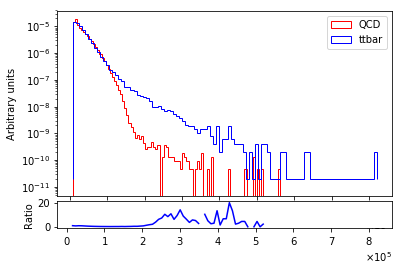

In [68]:
plotRatio([df['pt_uncalib'], df_tt['pt_uncalib']], 
          [{"color": 'r', "histtype":'step', "stacked":False, "fill":False, 'label': 'QCD'}, 
           {"color": 'b', "histtype":'step', "stacked":False, "fill":False, 'label': 'ttbar'}])